#Máster en Big Data y Data Science: Ciencia e Ingeniería de Datos
### ASIGNATURA: Indexación, búsqueda y análisis en repositorios multimedia
### PARTE: Multimedia (imagen, video)
### Práctica 1: Introducción al diseño de redes neuronales convolucionales con Pytorch mediante Google Colaboratory

---

Autor: Juan C. SanMiguel (juancarlos.sanmiguel@uam.es), Universidad Autónoma de Madrid

Fecha: Febrero 2018

# 4. Entrenamiento de una red con CPU (training)

En este script, se utilizarán las siguientes rutas

In [2]:
drivedir = '/content/gdrive'
tmpdir = '/content/tmp/' #temporal location to download and store the dataset

pracdir = drivedir + '/My Drive/p1indexacion' #directory for practica 1 indexacion
datadir = pracdir + '/data' #directory for storing datasets
resudir = pracdir + '/result' #directory to save results

## Preparación del entorno de trabajo: Pytorch

A continuación tiene un conjunto de instrucciones que instalan el software necesario para esta parte de la práctica.

Recuerde que este código es compatible con Python 3.

In [3]:
!pip3 install torch==1.10.0+cu111 torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.4 MB/s eta 0:15:21tcmalloc: large alloc 1147494400 bytes == 0x3aada000 @  0x7f55ed732615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:14:25tcmalloc: large alloc 1434370048 bytes == 0x7f130000 @  0x7f55ed732615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████

Descarga de ficheros adicionales

In [4]:
import os
import subprocess

tmpdir = '/content/tmp/' #temporal location to download and store the dataset

out=subprocess.call(["mkdir",tmpdir]) #create a empty directory
os.chdir(tmpdir) #move to directory

!wget http://www-vpu.eps.uam.es/~jcs/bigdata/utils.zip -O utils.zip #download utils
!unzip -o -q utils.zip -d . #unzip file

--2022-10-09 10:38:48--  http://www-vpu.eps.uam.es/~jcs/bigdata/utils.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.56.90
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.56.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2452 (2.4K) [application/zip]
Saving to: ‘utils.zip’

utils.zip           100%[===================>]   2.39K  --.-KB/s    in 0s      

2022-10-09 10:38:48 (284 MB/s) - ‘utils.zip’ saved [2452/2452]



## Preparación del entorno de trabajo: Google Drive

Ejecute el siguiente código para enlazar este script con su cuenta de Google Drive. Los datos que se generen aquí se guardarán en su carpeta Drive para posterior uso. Por defecto, la unidad de Google Drive es enlaza con el directorio **/content/drive/**.

In [5]:
from google.colab import drive
drive.mount(drivedir)

print("Google Drive mount completed")

#check correct mount of drive directory
!df -h

Mounted at /content/gdrive
Google Drive mount completed
Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   30G   49G  38% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        50G   36G   15G  72% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   15G  378M  98% /content/gdrive


## Dataset

En este ejemplo de entrenamiento, vamos a utilizar el dataset Scenes15

In [6]:
import subprocess
import os

out=subprocess.call(["mkdir",pracdir])#create directory
out=subprocess.call(["mkdir",datadir])#create directory
out=subprocess.call(["mkdir",resudir])#create directory

os.chdir(datadir) #move to directory

#download and unzip the file
!wget http://www-vpu.eps.uam.es/~jcs/bigdata/Scene15.zip -O Scene15.zip
!unzip -o -q Scene15.zip -d .

print('Dataset downloaded and unzipped')

!ls -lah #show directory & file usage

--2022-10-09 10:43:47--  http://www-vpu.eps.uam.es/~jcs/bigdata/Scene15.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.56.90
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.56.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86395596 (82M) [application/zip]
Saving to: ‘Scene15.zip’

Scene15.zip         100%[===================>]  82.39M  54.6MB/s    in 1.5s    

2022-10-09 10:43:48 (54.6 MB/s) - ‘Scene15.zip’ saved [86395596/86395596]

Dataset downloaded and unzipped
total 83M
drwx------ 4 root root 4.0K Oct  8 16:44 Scene15
-rw------- 1 root root  83M Feb 28  2018 Scene15.zip


Parametros para la generación del dataset

In [11]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

#path to the downloaded dataset
dataset_dir = datadir + '/Scene15/'

#number of samples/images per group
batch_size = 16
# batch_sizes=[2, 4, 8, 16, 32]

#data transformation
Resizing_factor = (128,128)
transform = transforms.Compose([ transforms.Resize(size=Resizing_factor),                                 
                                transforms.ToTensor()                                
                                ])

#list & load images
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transform) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

#load & convert images to tensors in Python
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

## Creación de la red

A continuación, creamos una red tipo Lenet (modificada para soportar imágenes distintas a 32x32)

In [12]:
import os
os.chdir(tmpdir) #move to directory

#runs script and keeps variables
%run -i ./utils/mylenet.py

# get some random training images to initialize network
images, labels = iter(dataloaders['train']).next()

net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
print(net)

print("Network ready to train!")

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=13456, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=15, bias=True)
)
Network ready to train!


## Definir una función de coste/optimizador

En este ejemplo utilizamos Cross-Entropy para medir la precisión de nuestro clasificador y SGD como optimizador.

In [13]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Entrenar la red

Ejecución iterativa sobre los datos de entrenamiento/test y actualización de los pesos

In [14]:
import time
import numpy as np
from torch.autograd import Variable

display_batch_iter = 100
number_epochs = 50

epoch_loss =  np.zeros((number_epochs,1))
epoch_train_acc =  np.zeros((number_epochs,1))
epoch_test_acc =  np.zeros((number_epochs,1))  
train_time =  0.0

Ntrain = len(image_datasets['train']) #number of samples for training
Ntest = len(image_datasets['val']) #number of samples for test/validation
    
device = torch.device("cpu") #CPU mode for training

start = time.time()

print('Training in CPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))
print('**** Printing loss every %5d batches ****' % (display_batch_iter))  
for epoch in range(number_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloaders['train'], 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.numpy()
        epoch_loss[epoch] += loss.data.numpy()
        if i % display_batch_iter == display_batch_iter-1:    # print every XXX mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / display_batch_iter))
            running_loss = 0.0

    # compute accuracy on training set
    correct1 = 0.0
    for data in dataloaders['train']:    
      images, labels = data
      outputs = net(Variable(images))
      _, predicted = torch.max(outputs.data, 1)
      correct1 += (predicted == labels).sum()
      
    # compute accuracy on test set
    correct2 = 0.0
    for data in dataloaders['val']:    
      images, labels = data
      outputs = net(Variable(images))
      _, predicted = torch.max(outputs.data, 1)
      correct2 += (predicted == labels).sum()
    
    epoch_loss[epoch] = epoch_loss[epoch] / len(dataloaders['train']) # average loss for each epoch
    epoch_train_acc[epoch] =  100 * correct1 / Ntrain   # average train accuracy for each epoch
    epoch_test_acc[epoch]  =  100 * correct2 / Ntest    # average test accuracy for each epoch
    print('Epoch %02d, loss: %1.3f, accuracy train: %2.3f %% (correct %04d total %04d ) accuracy test: %2.3f %% (correct %04d total %04d )' % (epoch + 1, epoch_loss[epoch], epoch_train_acc[epoch], correct1, Ntrain, epoch_test_acc[epoch], correct2, Ntest ))
    
train_time = time.time() - start
print('Finished Training (' + str(train_time) + ' secs)')

Training in CPUmode #epochs=50 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.710, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 7.002 % (correct 0209 total 2985 )
Epoch 02, loss: 2.707, accuracy train: 6.600 % (correct 0099 total 1500 ) accuracy test: 6.935 % (correct 0207 total 2985 )
Epoch 03, loss: 2.704, accuracy train: 8.867 % (correct 0133 total 1500 ) accuracy test: 8.610 % (correct 0257 total 2985 )
Epoch 04, loss: 2.697, accuracy train: 11.267 % (correct 0169 total 1500 ) accuracy test: 9.983 % (correct 0298 total 2985 )
Epoch 05, loss: 2.676, accuracy train: 15.067 % (correct 0226 total 1500 ) accuracy test: 11.156 % (correct 0333 total 2985 )
Epoch 06, loss: 2.626, accuracy train: 15.533 % (correct 0233 total 1500 ) accuracy test: 11.960 % (correct 0357 total 2985 )
Epoch 07, loss: 2.565, accuracy train: 17.867 % (correct 0268 total 1500 ) accuracy test: 11.859 % (correct 0354 total 2985 )
Epoch 08, loss: 2.497, ac

Finalmente podemos guardar los datos tras el entrenamiento en nuestra carpeta de Google Drive

In [15]:
#save results in a single file
import pickle
import os
os.chdir(pracdir) #move to drive directory

# Saving the objects:
f = open('training_baseline_cpu_results_epochs_'+ str(number_epochs) +'.pkl', 'wb')
pickle.dump([epoch_train_acc, epoch_test_acc, epoch_loss, train_time, number_epochs, batch_size], f)
f.close()
print('Saved data')

Saved data


Posteriormente, si quisieramos recuperar las variables/objetos para analizar, utilizaremos el siguiente código

In [ ]:
#get results from a single file
import pickle
import os
os.chdir(pracdir) #move to drive directory

# Load the objects
f = open('training_baseline_results_epochs_30.pkl', 'rb')
epoch_train_acc, epoch_test_acc, epoch_loss, train_time, number_epochs, batch_size = pickle.load(f)

FileNotFoundError: ignored

# Resultados tras entrenamiento 



## Análisis de precisión y función de pérdidas
A continuación pintamos las variables que hemos acumulado durante el entrenamiento.

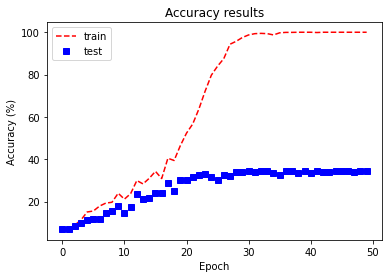

In [16]:
import matplotlib.pyplot as plt

t = range(number_epochs)
lineObjects =plt.plot(t,epoch_train_acc,'r--',t,epoch_test_acc,'bs')
plt.legend(lineObjects, ('train', 'test'))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.title('Accuracy results') 

import os
os.chdir(pracdir) #move to drive directory for saving data

plt.savefig('training_accuracy_baseline__epochs'+ str(number_epochs) + '_CPU.png',bbox_inches='tight')#call this function before "plt.show()"
plt.show()

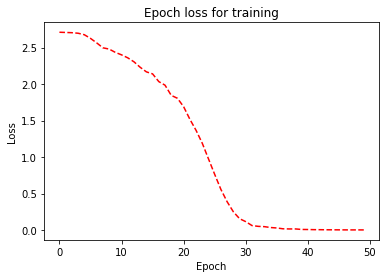

In [17]:
import matplotlib.pyplot as plt

t = range(number_epochs)
plt.plot(t,epoch_loss,'r--')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoch loss for training') 
plt.show()

## Ejemplos de resultado

Es recomendable repasar los resultados obtenidos tanto gráficamente como estadísticamente.

Primero, seleccionamos algunos datos y visualmente verificamos errores:


GroundTruth:  Forest Forest InsideCity Store OpenCountry InsideCity OpenCountry Forest
Predicted:  InsideCity Mountain TallBuilding Office Coast Office Coast Store


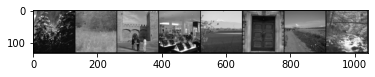

In [13]:
import torchvision

# function to show an image
def imshow(img):
    #img = img / 2 + 0.5  # unnormalize if normalization is done in transform
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
#get sample data
images, labels = iter(dataloaders['val']).next()
   
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(batch_size)))

outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]] for j in range(batch_size)))

Posteriormente estudiamos los resultados para cada clase

In [14]:
class_correct = list(0. for i in range(len(class_names)))
class_total = list(0. for i in range(len(class_names)))
for data in dataloaders['val']:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += float(c.numpy().reshape(1,c.numpy().size)[0,i])
        class_total[label] += 1

class_totalT = 0
for i in range(len(class_names)):
    print('Accuracy of %5s : %2d %%' % (class_names[i], 100 * class_correct[i] / class_total[i]))
    class_totalT += class_total[i]
print('Total test data = %d images' % (class_totalT))

Accuracy of Bedroom : 20 %
Accuracy of Coast : 43 %
Accuracy of Forest : 26 %
Accuracy of Highway : 58 %
Accuracy of Industrial : 14 %
Accuracy of InsideCity : 16 %
Accuracy of Kitchen : 16 %
Accuracy of LivingRoom : 30 %
Accuracy of Mountain : 28 %
Accuracy of Office : 36 %
Accuracy of OpenCountry : 41 %
Accuracy of Store : 25 %
Accuracy of Street : 46 %
Accuracy of Suburb : 46 %
Accuracy of TallBuilding : 44 %
Total test data = 2985 images
